<a href="https://colab.research.google.com/github/Mercymerine/Pandas-Analysis/blob/main/project_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/Capstone_project2/covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**DATA CLEANING**

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [ ]:
covid['Province/State'].fillna('N/A', inplace =True)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   306429 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [ ]:

from dateutil import parser

def parse_date(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return pd.NaT

covid['Last Update'] = covid['Last Update'].apply(parse_date)

print(covid)
print(covid.dtypes)

           SNo ObservationDate     Province/State  Country/Region  \
0            1      2020-01-22              Anhui  Mainland China   
1            2      2020-01-22            Beijing  Mainland China   
2            3      2020-01-22          Chongqing  Mainland China   
3            4      2020-01-22             Fujian  Mainland China   
4            5      2020-01-22              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      2021-05-29  Zaporizhia Oblast         Ukraine   
306425  306426      2021-05-29            Zeeland     Netherlands   
306426  306427      2021-05-29           Zhejiang  Mainland China   
306427  306428      2021-05-29    Zhytomyr Oblast         Ukraine   
306428  306429      2021-05-29       Zuid-Holland     Netherlands   

               Last Update  Confirmed  Deaths  Recovered  
0      2020-01-22 17:00:00        1.0     0.0        0.0  
1      2020-01-22 17:00:00       14.0     0.0        

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   306429 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  datetime64[ns]
 5   Confirmed        306429 non-null  float64       
 6   Deaths           306429 non-null  float64       
 7   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 18.7+ MB


In [ ]:
covid.describe()

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
count,306429.000000,306429,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,2021-03-11 01:14:17.227314944,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,2020-01-22 17:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,2021-04-02 15:13:53,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,2021-04-02 15:13:53,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,2021-04-02 15:13:53,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,2021-05-30 04:20:55,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,NaN,2.775516e+05,6410.938048,2.015124e+05


In [ ]:
#covid.to_csv('covid.csv', index=False)

In [ ]:
covid.duplicated().sum()

0

**DATA VISUALIZATION**

LINE GRAPH TO SHOW THE TREND OF COVID-19

In [ ]:
daily_cases = covid.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
daily_cases

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,557.0,17.0,30.0
1,2020-01-23,1097.0,34.0,60.0
2,2020-01-24,941.0,26.0,39.0
3,2020-01-25,1437.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0
...,...,...,...,...
489,2021-05-25,167848207.0,3485788.0,104824935.0
490,2021-05-26,168416423.0,3498544.0,105380748.0
491,2021-05-27,168970791.0,3511297.0,106078106.0
492,2021-05-28,169470725.0,3523117.0,106633069.0


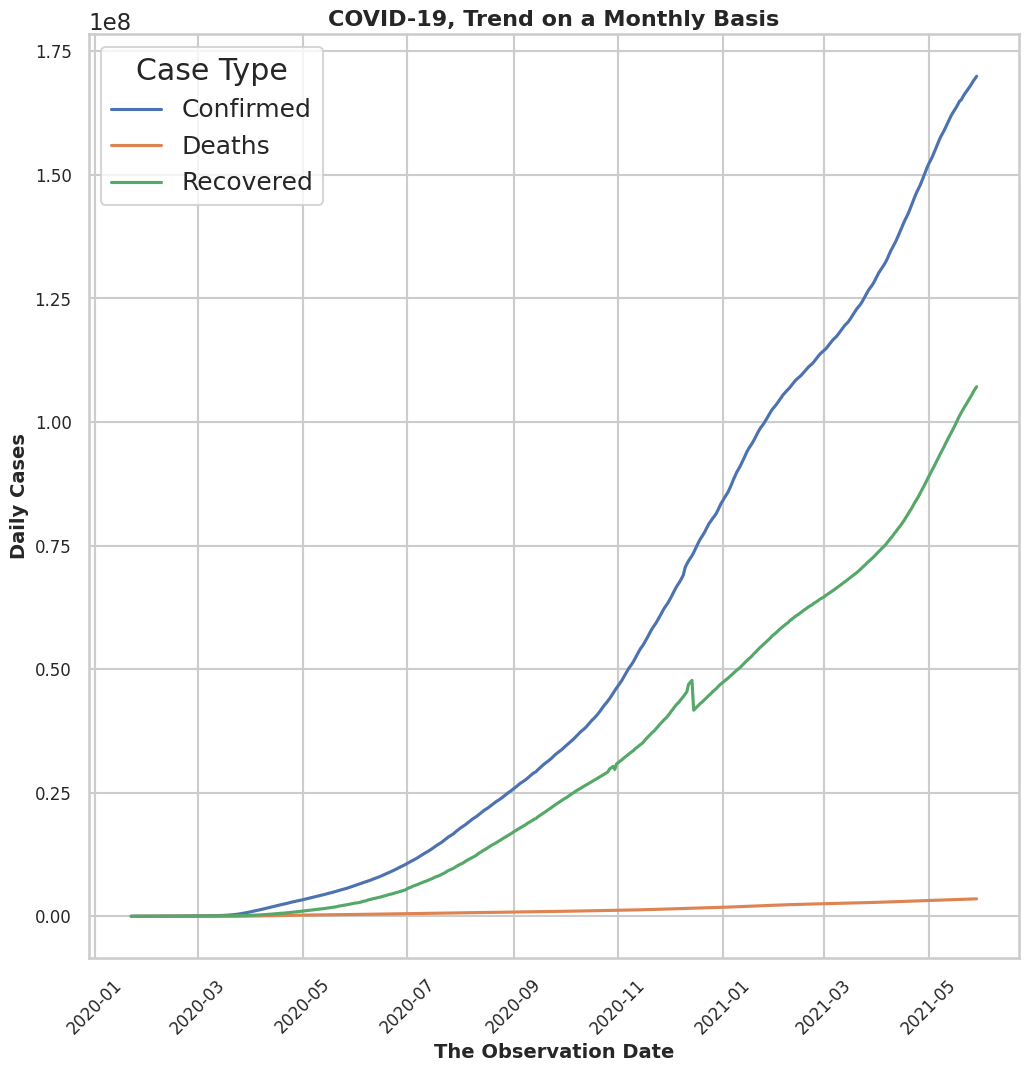

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(style='whitegrid', context='talk')
sns.lineplot(daily_cases, x='ObservationDate', y ='Confirmed', label='Confirmed')
sns.lineplot(daily_cases, x='ObservationDate', y ='Deaths', label='Deaths')

sns.lineplot(daily_cases, x='ObservationDate', y ='Recovered', label='Recovered')
plt.legend(title = 'Case Type', loc='upper left', fontsize='medium', title_fontsize='large')
plt.ylabel('Daily Cases', fontsize=14, fontweight='bold')
plt.yticks(fontsize = 12)
plt.xlabel('The Observation Date', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.title('COVID-19, Trend on a Monthly Basis', fontweight='bold', fontsize=16)
plt.show()

In [ ]:
# Line graph to the minimum value, median value and the maximum value= rate of change

**MAPPING THE SPREAD OF COVID-19 WORLDWIDE**

In [ ]:
maximum = covid.groupby(['Country/Region'])[['Confirmed']].max().reset_index()
maximum = maximum.sort_values(by='Confirmed', ascending=False)
maximum.head(10)

,Country/Region,Confirmed
71,France,5863138.0
96,India,5713215.0
212,Turkey,5235978.0
213,UK,3910803.0
214,US,3788713.0
8,Argentina,3732263.0
27,Brazil,3254893.0
98,Iran,2893218.0
164,Poland,2871371.0
97,Indonesia,1809926.0


In [ ]:
maximum = covid.groupby(['Country/Region'])[['Confirmed']].max().reset_index()
maximum = maximum.sort_values(by='Confirmed', ascending=False)
maximum.head(10)

,Country/Region,Confirmed
71,France,5863138.0
96,India,5713215.0
212,Turkey,5235978.0
213,UK,3910803.0
214,US,3788713.0
8,Argentina,3732263.0
27,Brazil,3254893.0
98,Iran,2893218.0
164,Poland,2871371.0
97,Indonesia,1809926.0


In [ ]:
import geopandas as gdp

In [ ]:
world_data = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
world_data.head()

<ipython-input-19-0aab325ca927>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world_maximum = world_data.merge(maximum, how='outer', left_on='name', right_on='Country/Region')
world_maximum.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country/Region,Confirmed
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,360.0
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,509.0
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,537138.0
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


In [ ]:
world_maximum.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'Country/Region', 'Confirmed'],
      dtype='object')

In [ ]:
dropping=['pop_est',  'iso_a3', 'gdp_md_est' ]
world_maximum.drop(columns=dropping, inplace=True)

In [ ]:
world_maximum.to_csv('world_maximum.csv', index=False)

In [ ]:
world_maximum.head()

,continent,name,geometry,Country/Region,Confirmed
0,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,360.0
1,Africa,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,509.0
2,Africa,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,North America,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,537138.0
4,North America,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


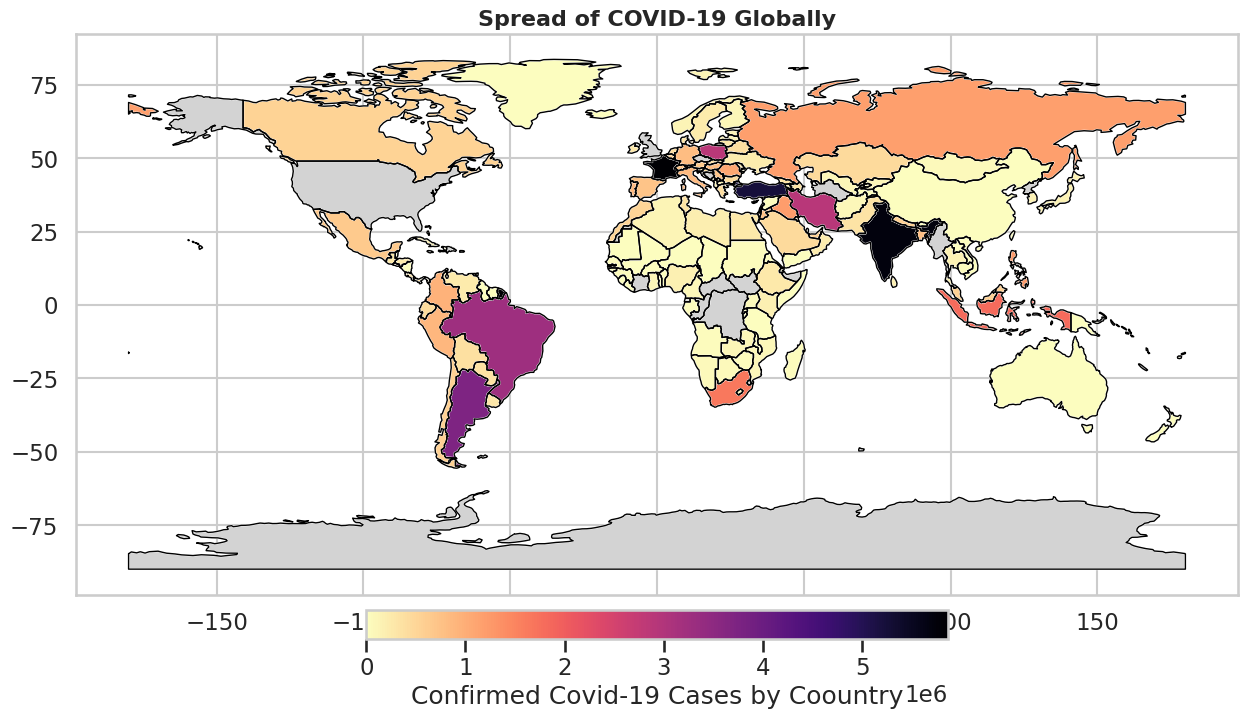

In [ ]:
fig, ax=plt.subplots(1, 1, figsize=(15, 10))

#Plotting world boundaries
world_maximum.boundary.plot(ax=ax, linewidth=1, color='black')

#Plotting confirmes cases by country
world_maximum.plot(column='Confirmed', ax=ax, legend=True, legend_kwds={'label':'Confirmed Covid-19 Cases by Coountry', 'orientation':'horizontal', 'shrink':0.5, 'pad':0.02}, cmap='magma_r', missing_kwds={'color':'lightgrey'})

#Adding a color bar
cbar = ax.get_figure().get_axes()[1]



plt.title('Spread of COVID-19 Globally', fontweight='bold', fontsize=16)
plt.show()

BAR PLOT TO SHOW THE TOP TEN COUNTRIES THAT WERE MOSTLY AFFECTED BY COVID

In [ ]:
maximum = covid.groupby(['Country/Region'])[['Confirmed']].max().reset_index()
maximum.head(10)

,Country/Region,Confirmed
0,Azerbaijan,1.0
1,"('St. Martin',)",2.0
2,Afghanistan,70111.0
3,Albania,132297.0
4,Algeria,128456.0
5,Andorra,13693.0
6,Angola,34180.0
7,Antigua and Barbuda,1259.0
8,Argentina,3732263.0
9,Armenia,222555.0


In [ ]:
maximum['Country/Region'].unique()

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethi

In [ ]:
maximum = covid.groupby(['Country/Region'])[['Confirmed']].max().reset_index()
maximum = maximum.sort_values(by='Confirmed', ascending=False)
maximum.head(10)

,Country/Region,Confirmed
71,France,5863138.0
96,India,5713215.0
212,Turkey,5235978.0
213,UK,3910803.0
214,US,3788713.0
8,Argentina,3732263.0
27,Brazil,3254893.0
98,Iran,2893218.0
164,Poland,2871371.0
97,Indonesia,1809926.0


In [ ]:
ten=maximum.head(10)

<ipython-input-31-e1712a49481c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=ten, palette='viridis')


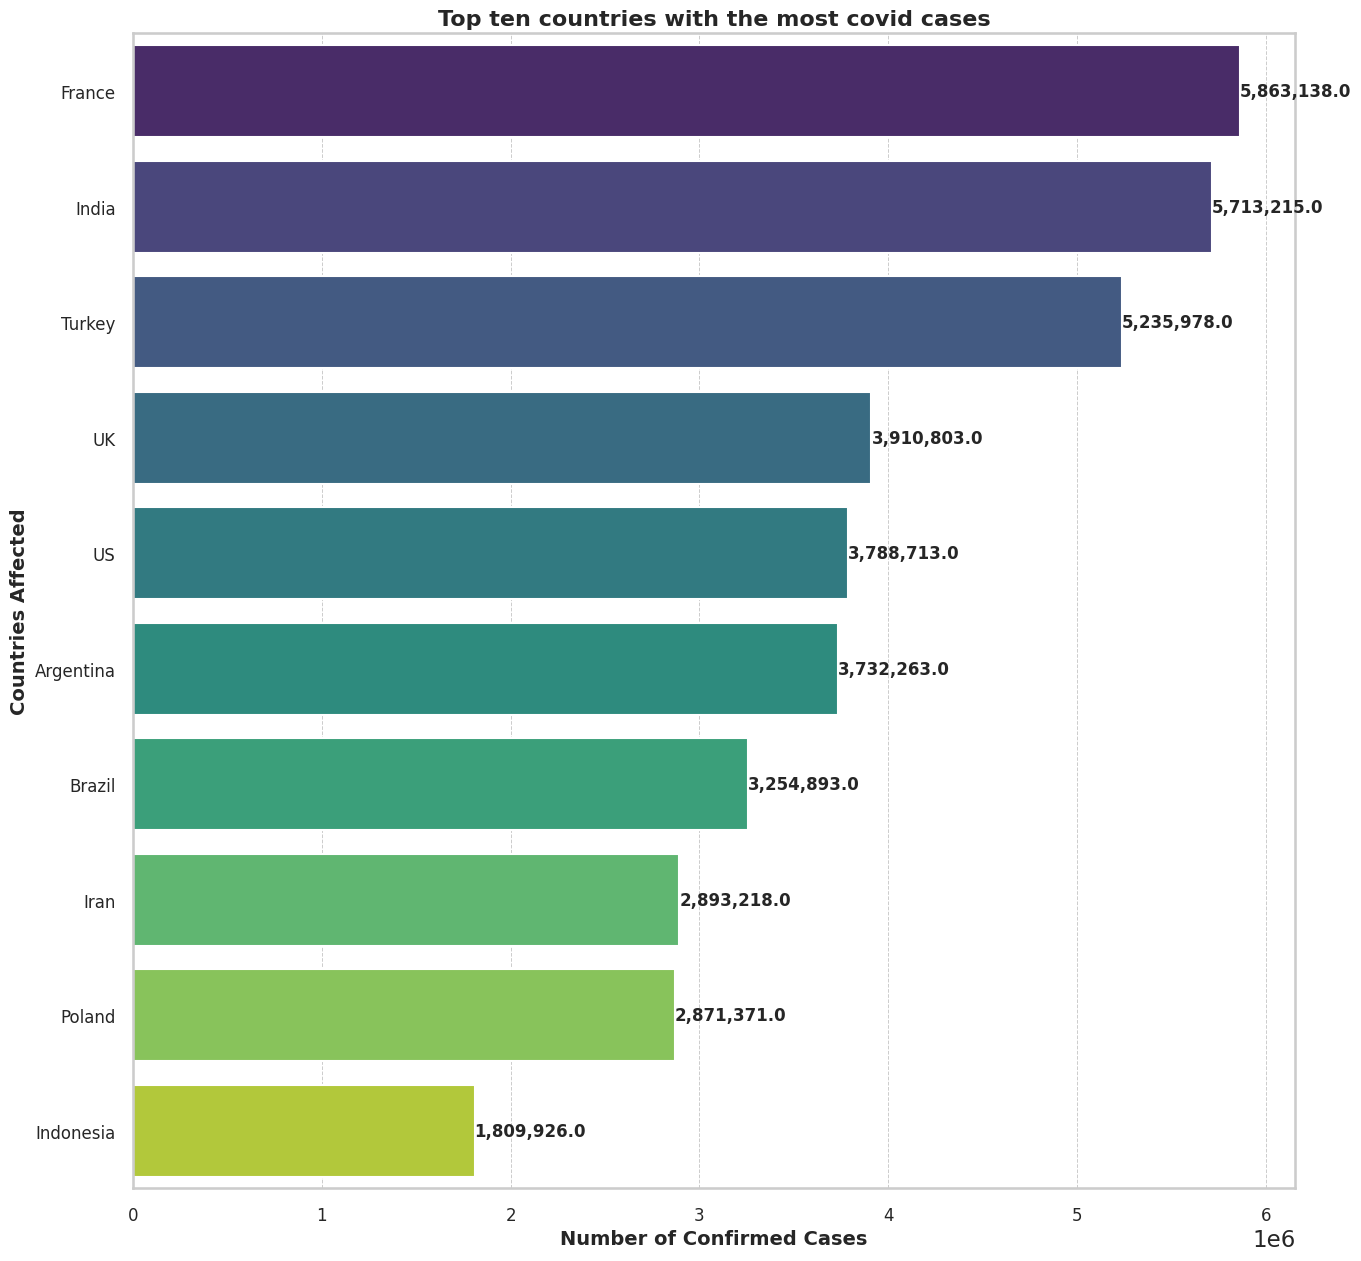

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x='Confirmed', y='Country/Region', data=ten, palette='viridis')


for index, value in enumerate(ten['Confirmed']):
  plt.text(value, index, f'{value:,}', va='center', ha='left', fontsize=12, fontweight='bold')

plt.xlabel('Number of Confirmed Cases', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Countries Affected', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, rotation=0)
plt.title('Top ten countries with the most covid cases', fontsize=16, fontweight='bold')

plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.show()

In [ ]:
deaths = covid.groupby(['Country/Region'])[['Deaths']].max().reset_index()
deaths = maximum.sort_values(by='Deaths', ascending=False)
deaths.head(10)

,Country/Region,Deaths
213,UK,112385.0
27,Brazil,111123.0
71,France,108532.0
96,India,94030.0
98,Iran,79741.0
8,Argentina,77108.0
164,Poland,73682.0
214,US,63236.0
191,South Africa,56363.0
97,Indonesia,50262.0


In [ ]:
top_ten = deaths.head(10)

<ipython-input-39-f81323b5c507>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths', y='Country/Region', data=top_ten, palette='magma')


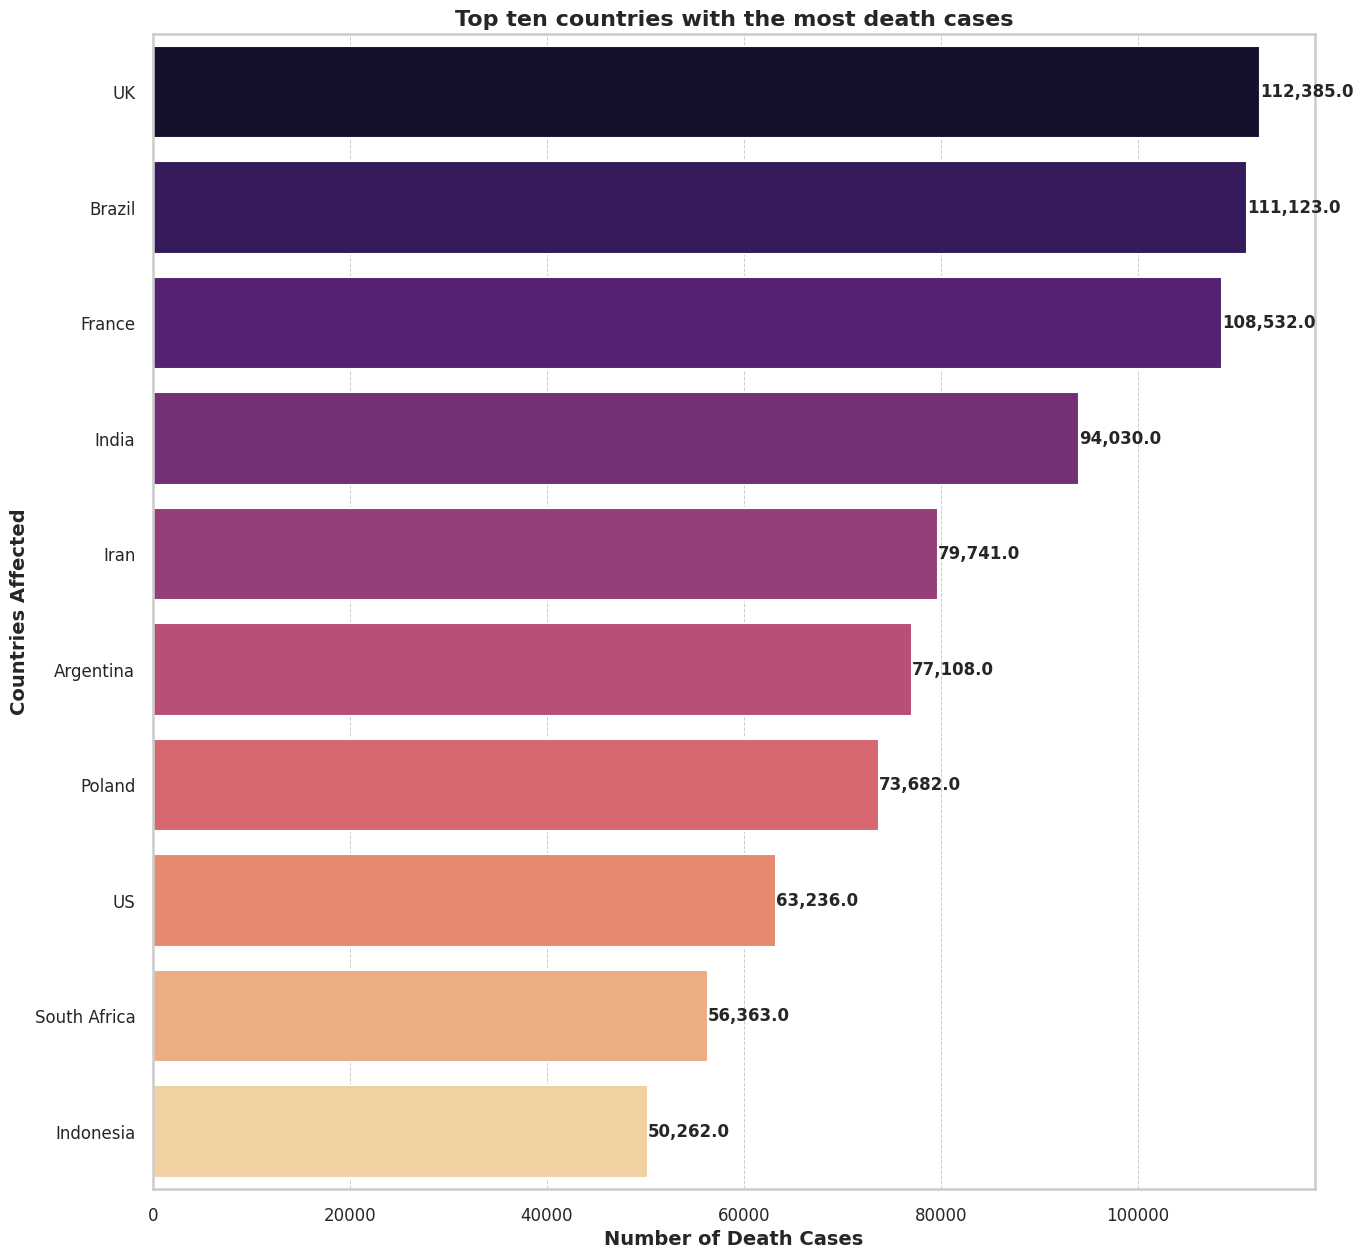

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x='Deaths', y='Country/Region', data=top_ten, palette='magma')


for index, value in enumerate(top_ten['Deaths']):
  plt.text(value, index, f'{value:,}', va='center', ha='left', fontsize=12, fontweight='bold')

plt.xlabel('Number of Death Cases', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Countries Affected', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, rotation=0)
plt.title('Top ten countries with the most death cases', fontsize=16, fontweight='bold')

plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.show()

In [ ]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [ ]:
recovered = covid.groupby(['Country/Region'])[['Recovered']].max().reset_index()
recovered= recovered.sort_values(by='Recovered', ascending=False)
recovered.head(10)

,Country/Region,Recovered
214,US,6399531.0
96,India,5339838.0
212,Turkey,5094279.0
8,Argentina,3288467.0
27,Brazil,2895697.0
164,Poland,2636675.0
98,Iran,2425033.0
137,Mexico,1924865.0
162,Peru,1897522.0
97,Indonesia,1659974.0


In [ ]:
recovered = recovered.head(10)

<ipython-input-49-f1a773b904cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recovered', y='Country/Region', data=recovered, palette='cividis')


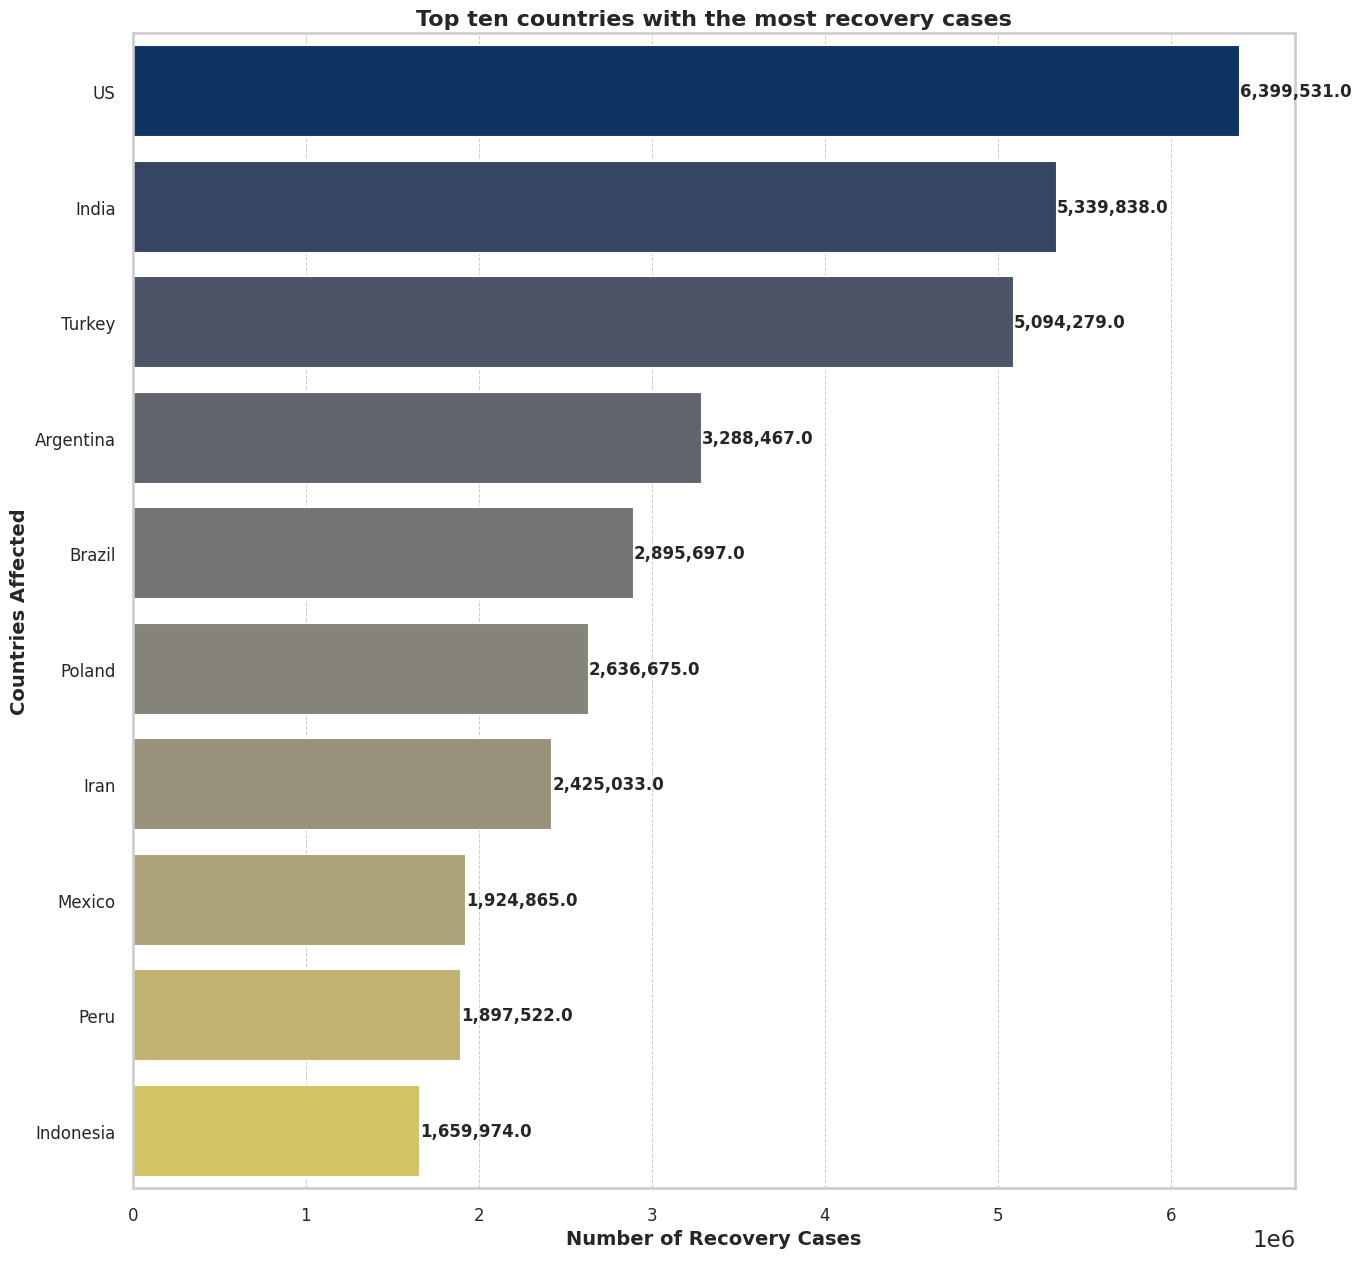

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x='Recovered', y='Country/Region', data=recovered, palette='cividis')


for index, value in enumerate(recovered['Recovered']):
  plt.text(value, index, f'{value:,}', va='center', ha='left', fontsize=12, fontweight='bold')

plt.xlabel('Number of Recovery Cases', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Countries Affected', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, rotation=0)
plt.title('Top ten countries with the most recovery cases', fontsize=16, fontweight='bold')

plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.show()